## Immune Scores EDA

We used CIBERSORTx to calculate immune scores from our rna counts dataset. Since it had no APIs, we had to manually upload our data files on their website for calculation. 

After getting `CIBERSORTx_Job_Results.csv`, we perform EDA on it. 

In [ ]:
import pandas as pd

immune_path = "../Immune scores/CIBERSORTx_Job_Results.csv"

immune = pd.read_csv(immune_path, index_col=0)

print("Matrix shape:", immune.shape) 
print("First 10 columns:", immune.columns[:10].tolist())
immune.head()


Matrix shape: (693, 25)
First 10 columns: ['B cells naive', 'B cells memory', 'Plasma cells', 'T cells CD8', 'T cells CD4 naive', 'T cells CD4 memory resting', 'T cells CD4 memory activated', 'T cells follicular helper', 'T cells regulatory (Tregs)', 'T cells gamma delta']


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
TCGA-A7-A0DC,0.000000,0.0,0.071796,0.000000,0.0,0.375153,0.0,0.000000,0.000000,0.0,...,0.154642,0.000000,0.0,0.093497,0.000000,0.009848,0.0,0.98,-0.061494,1.120212
TCGA-Z7-A8R6,0.056932,0.0,0.024094,0.014420,0.0,0.223738,0.0,0.019018,0.059257,0.0,...,0.271005,0.000574,0.0,0.111704,0.000000,0.000000,0.0,0.14,0.080168,1.049131
TCGA-C8-A1HE,0.113594,0.0,0.021893,0.000000,0.0,0.324533,0.0,0.000000,0.004438,0.0,...,0.334839,0.000000,0.0,0.000000,0.022001,0.000000,0.0,0.56,0.009366,1.080235
TCGA-AC-A2FM,0.082339,0.0,0.046135,0.021977,0.0,0.319833,0.0,0.000000,0.025874,0.0,...,0.247160,0.000000,0.0,0.151869,0.006133,0.000000,0.0,0.98,-0.059401,1.097844
TCGA-B6-A1KF,0.107379,0.0,0.016538,0.000000,0.0,0.000000,0.0,0.182391,0.000000,0.0,...,0.090206,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.06,0.169241,1.075507


In [ ]:

clinical = pd.read_hdf("../data/clinical_matched_final.h5", key="clinical")

clinical = clinical.set_index("bcr_patient_barcode")

coldata = clinical[["Subtype_binary"]].copy()


In [ ]:
#Keep the 22 immune fractions / removing irrelevant columns
immune_cells = immune.iloc[:, :22].copy()

# Append the subtype label
immune_cells["Subtype_binary"] = coldata.loc[immune_cells.index, "Subtype_binary"]

# Quick sanity check
print(immune_cells.shape)
print(immune_cells["Subtype_binary"].value_counts())
immune_cells.head()


(693, 23)
Subtype_binary
Luminal    558
Basal      135
Name: count, dtype: int64


,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,Subtype_binary
Mixture,,,,,,,,,,,,,,,,,,,,,
TCGA-A7-A0DC,0.000000,0.0,0.071796,0.000000,0.0,0.375153,0.0,0.000000,0.000000,0.0,...,0.238657,0.000000,0.154642,0.000000,0.0,0.093497,0.000000,0.009848,0.0,Luminal
TCGA-Z7-A8R6,0.056932,0.0,0.024094,0.014420,0.0,0.223738,0.0,0.019018,0.059257,0.0,...,0.122433,0.072144,0.271005,0.000574,0.0,0.111704,0.000000,0.000000,0.0,Luminal
TCGA-C8-A1HE,0.113594,0.0,0.021893,0.000000,0.0,0.324533,0.0,0.000000,0.004438,0.0,...,0.000000,0.039729,0.334839,0.000000,0.0,0.000000,0.022001,0.000000,0.0,Luminal
TCGA-AC-A2FM,0.082339,0.0,0.046135,0.021977,0.0,0.319833,0.0,0.000000,0.025874,0.0,...,0.000000,0.045664,0.247160,0.000000,0.0,0.151869,0.006133,0.000000,0.0,Luminal
TCGA-B6-A1KF,0.107379,0.0,0.016538,0.000000,0.0,0.000000,0.0,0.182391,0.000000,0.0,...,0.553004,0.000000,0.090206,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Basal


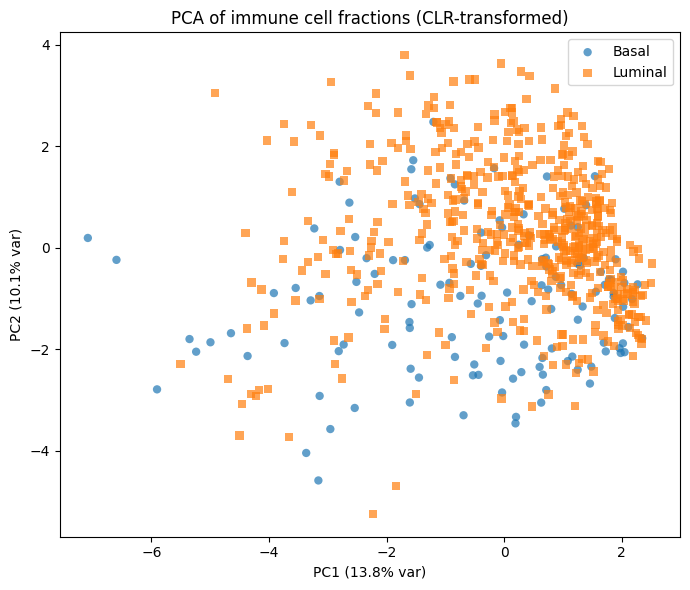

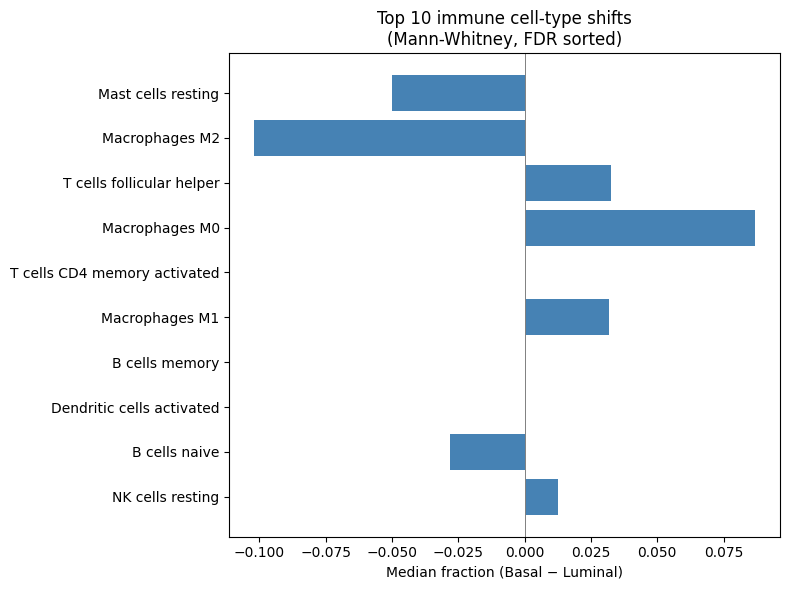

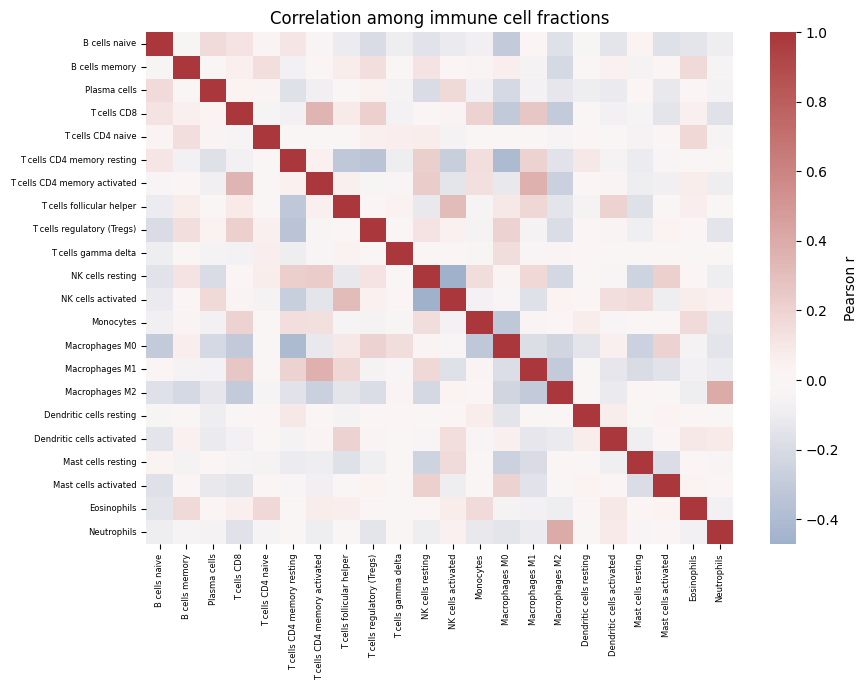

,Cell_type,Median_Basal,Median_Luminal,Median_diff,p_raw,p_adj
18,Mast cells resting,0.001507,0.051687,-0.050180,9.946221e-27,2.188169e-25
15,Macrophages M2,0.127510,0.229411,-0.101900,6.776711e-19,7.454382e-18
7,T cells follicular helper,0.040357,0.007945,0.032412,2.918931e-16,2.140550e-15
13,Macrophages M0,0.132783,0.045923,0.086860,1.430354e-12,7.866946e-12
6,T cells CD4 memory activated,0.000000,0.000000,0.000000,1.540102e-11,6.776450e-11
14,Macrophages M1,0.072662,0.040977,0.031685,4.090149e-09,1.499721e-08
1,B cells memory,0.000000,0.000000,0.000000,1.660163e-08,5.217656e-08
17,Dendritic cells activated,0.000000,0.000000,0.000000,1.413315e-07,3.886617e-07
0,B cells naive,0.052658,0.080884,-0.028226,7.134505e-06,1.743990e-05
10,NK cells resting,0.039594,0.026903,0.012690,2.881542e-03,6.339393e-03


In [ ]:
IMMUNE_CSV  = "../Immune scores/CIBERSORTx_Job2_Results.csv"
CLINICAL_H5 = "../data/clinical_matched_final.h5"
CLINICAL_KEY = "clinical"
SUBTYPE_COL  = "Subtype_binary"

# ---------------------------------------------------------------------
# 0. Imports
# ---------------------------------------------------------------------
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# ---------------------------------------------------------------------
# 1. Helper: CLR transform (fixed – no keepdims arg)
# ---------------------------------------------------------------------
def clr(mat: pd.DataFrame, pseudocount: float = 1e-6) -> pd.DataFrame:
    """Centred-log-ratio transform of each row (sample) of a proportion matrix."""
    log = np.log(mat + pseudocount)
    gm  = log.mean(axis=1)              
    return log.sub(gm, axis=0)         

# ---------------------------------------------------------------------
# 2. Load immune fractions & subtype labels
# ---------------------------------------------------------------------
immune_raw = pd.read_csv(IMMUNE_CSV, index_col=0)   
immune     = immune_raw.iloc[:, :22]                

clinical   = pd.read_hdf(CLINICAL_H5, key=CLINICAL_KEY).set_index("submitter_id")
subtypes   = clinical.loc[immune.index, SUBTYPE_COL]

assert subtypes.isna().sum() == 0, "Missing subtype labels!"

# ---------------------------------------------------------------------
# 3. CLR-transform + PCA
# ---------------------------------------------------------------------
immune_clr = clr(immune)                            
X_scaled   = StandardScaler().fit_transform(immune_clr)
pca        = PCA(n_components=2).fit(X_scaled)
scores     = pca.transform(X_scaled)

plt.figure(figsize=(7,6))
for subtype, mark in zip(["Basal","Luminal"], ["o","s"]):
    idx = subtypes == subtype
    plt.scatter(scores[idx,0], scores[idx,1],
                label=subtype, marker=mark, alpha=0.7, edgecolor="none")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA of immune cell fractions (CLR-transformed)")
plt.legend(); plt.tight_layout(); plt.show()

# ---------------------------------------------------------------------
# 4. Mann-Whitney U for each cell type
# ---------------------------------------------------------------------
records = []
basal_idx, lum_idx = subtypes=="Basal", subtypes=="Luminal"

for cell in immune.columns:
    u, p_raw = mannwhitneyu(immune.loc[basal_idx, cell],
                            immune.loc[lum_idx,   cell],
                            alternative="two-sided")
    med_basal   = immune.loc[basal_idx, cell].median()
    med_luminal = immune.loc[lum_idx,   cell].median()
    records.append((cell, med_basal, med_luminal, med_basal-med_luminal, p_raw))

res_df = (pd.DataFrame(records, columns=["Cell_type","Median_Basal",
                                         "Median_Luminal","Median_diff","p_raw"])
            .assign(p_adj=lambda df:
                    multipletests(df["p_raw"], method="fdr_bh")[1])
            .sort_values("p_adj"))

# ---------------------------------------------------------------------
# 5. Bar chart – top 10 most significant shifts
# ---------------------------------------------------------------------
top10 = res_df.head(10)
plt.figure(figsize=(8,6))
plt.barh(top10["Cell_type"], top10["Median_diff"], color="steelblue")
plt.axvline(0, color="grey", lw=0.7)
plt.xlabel("Median fraction (Basal − Luminal)")
plt.title("Top 10 immune cell-type shifts\n(Mann-Whitney, FDR sorted)")
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

# ---------------------------------------------------------------------
# 6. Correlation heat-map among fractions
# ---------------------------------------------------------------------
plt.figure(figsize=(9,7))
sns.heatmap(immune.corr(), cmap="vlag", center=0,
            xticklabels=True, yticklabels=True,
            cbar_kws=dict(label="Pearson r"))
plt.title("Correlation among immune cell fractions")
plt.xticks(rotation=90, fontsize=6); plt.yticks(fontsize=6)
plt.tight_layout(); plt.show()

# ---------------------------------------------------------------------
# 7. Show / save full stats table
# ---------------------------------------------------------------------
display(res_df)



In [ ]:
immune_fractions = immune.iloc[:, :22].copy()

# Trim aliquot IDs to the 10-char patient barcode
immune_fractions.index = immune_fractions.index.str.slice(0, 10)
immune_fractions.index.name = "Patient_ID"

# Write to a brand-new Excel file
immune_fractions.reset_index().to_csv(
    "immune_features.csv",      
    index=False
)